In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sentence_transformers import SentenceTransformer


/Users/edwardkrueger/.local/share/virtualenvs/priority-based-simulation-EYHjacIM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [3]:
df = pd.read_csv("data/economic_news_sample.csv")

X = df["text"]
X = model.encode(X)


y = df["relevance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [4]:
model = make_pipeline(
    LogisticRegressionCV()
)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1234
           1       0.00      0.00      0.00       266

    accuracy                           0.82      1500
   macro avg       0.41      0.50      0.45      1500
weighted avg       0.68      0.82      0.74      1500




/Users/edwardkrueger/.local/share/virtualenvs/priority-based-simulation-EYHjacIM/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/edwardkrueger/.local/share/virtualenvs/priority-based-simulation-EYHjacIM/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/edwardkrueger/.local/share/virtualenvs/priority-based-simulation-EYHjacIM/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in la

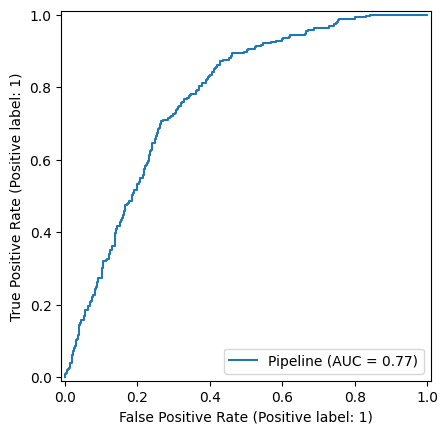

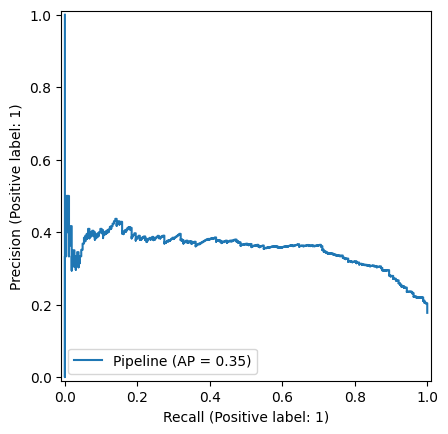

In [5]:

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

RocCurveDisplay.from_estimator(model, X_test, y=y_test)
PrecisionRecallDisplay.from_estimator(model, X_test, y=y_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print()